In [1]:
# Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

In [2]:
# Read the csv file into a pandas DataFrame
hr_df = pd.read_csv("/content/drive/MyDrive/Netflix_Statistical_Modeling/HREmployeeAttrition.csv")
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# Select our independent X variables, and our dependent y variable. 
X = hr_df.drop(columns = ['Attrition'])
y = hr_df['Attrition']

In [4]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
print("Total Count:")
print(y.value_counts())
print("Percentage value:")
print(y.value_counts(normalize=True))

Total Count:
0    1233
1     237
Name: Attrition, dtype: int64
Percentage value:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


In [5]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [6]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
print("Total Count:")
print(y.value_counts())
print("Percentage value:")
print(y.value_counts(normalize=True))

Total Count:
0    1233
1     237
Name: Attrition, dtype: int64
Percentage value:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


In [7]:
# Create a Linear Regression model object
lr_model = LogisticRegression(solver='liblinear')

In [8]:
# Train the model using the training datasets
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [9]:
# Make predictions using the testing dataset
y_pred = lr_model.predict(X_test)
print(f'Accuracy is: {lr_model.score(X_test, y_test)}')

Accuracy is: 0.826530612244898


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


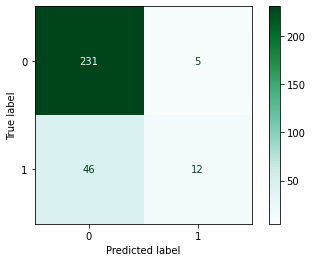

In [10]:
# Plot the Confusion Matrix values
plot_confusion_matrix(lr_model, X_test, y_test, cmap=plt.cm.BuGn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


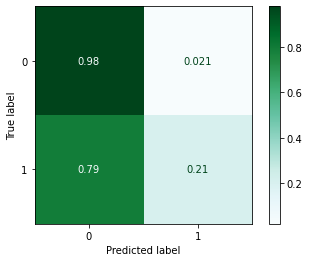

In [11]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(lr_model, X_test, y_test, cmap=plt.cm.BuGn, normalize='true')

In [12]:
# Print classification report

print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))

              precision    recall  f1-score   support

   Attrition       0.83      0.98      0.90       236
No Attrition       0.71      0.21      0.32        58

    accuracy                           0.83       294
   macro avg       0.77      0.59      0.61       294
weighted avg       0.81      0.83      0.79       294



In [13]:
# Create our Validation training and testing datasets with balancing.
B = hr_df[hr_df['Attrition'] == 0].iloc[:47]
A = hr_df[hr_df['Attrition'] == 1].iloc[:47]
x = pd.concat([A, B], ignore_index=True)
X = x.drop(columns = ['Attrition'])
y = x['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [14]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
print("Total Count:")
print(y_test.value_counts())
print("Percentage value:")
print(y_test.value_counts(normalize=True))

Total Count:
1    10
0     9
Name: Attrition, dtype: int64
Percentage value:
1    0.526316
0    0.473684
Name: Attrition, dtype: float64


In [15]:
# Create the Linear Regression model object
lr_model = LogisticRegression(solver='liblinear')

In [16]:
# Train the model using the training sets
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [17]:
# Make predictions using the testing dataset
y_pred = lr_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


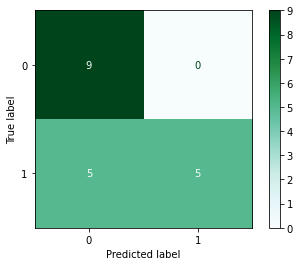

In [18]:
# Plot the Confusion Matrix values
plot_confusion_matrix(lr_model, X_test, y_test, cmap=plt.cm.BuGn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


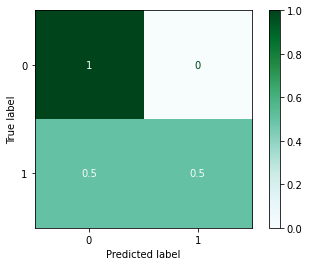

In [19]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(lr_model, X_test, y_test, cmap=plt.cm.BuGn, normalize='true')

In [20]:
# Print classification report
print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))

              precision    recall  f1-score   support

   Attrition       0.64      1.00      0.78         9
No Attrition       1.00      0.50      0.67        10

    accuracy                           0.74        19
   macro avg       0.82      0.75      0.72        19
weighted avg       0.83      0.74      0.72        19

